<a href="https://colab.research.google.com/github/VineetKiragi/CMPE-257/blob/main/CMPE_257_Question_Answering_Task_Rahul_NLP_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Make sure you have a GPU running
!nvidia-smi

Mon Dec  5 21:54:12 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   38C    P0    24W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## EXPLORATORY DATA ANALYSIS

In [3]:
import json
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer
from sklearn.model_selection import train_test_split

In [4]:
null = "null"
false=False
true = True

with open("/content/drive/MyDrive/merged_file.json", encoding='UTF-8') as f:
    a= json.load(f)

In [ ]:
# a

In [5]:
p = []
q=[]
ans = []
astart = []
aend= []
for i in a["data"]:
    for j in i["paragraphs"][0]["qas"]:
        #print(j)
        if(len(j["answers"])!=0):
          astart.append(j["answers"][0]["answer_start"])

          p.append(i["paragraphs"][0]["context"])
          q.append(j["question"])
          
          ans.append(j["answers"][0]["text"])
          aend.append(j["answers"][0]["answer_end"])
        
df = pd.DataFrame()
df["context"] = p
df["questions"] = q
df["answer"] = ans
df["answer_start"] = astart
df["answer_end"] = aend


In [6]:
df.head()

,context,questions,answer,answer_start,answer_end
0,Los Angeles is a sprawling Southern California...,In which state is Los Angeles?,California,36,46
1,Los Angeles is a sprawling Southern California...,What more can be told about the city?,TCL Chinese Theatre displays celebrities’ hand...,266,415
2,Los Angeles is a sprawling Southern California...,What are some iconic thing about the city?,"Paramount Pictures, Universal and Warner Brothers",161,210
3,New York City comprises 5 boroughs sitting whe...,What are some iconic thing about the city?,Empire State Building and sprawling Central Park,269,318
4,New York City comprises 5 boroughs sitting whe...,What could be said the geography of the city?,comprises 5 boroughs sitting where the Hudson ...,14,90


## VISUALIZATION

In [7]:
from itertools import chain
from nltk.stem import PorterStemmer
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

In [8]:
allwords = " ".join(df["answer"])

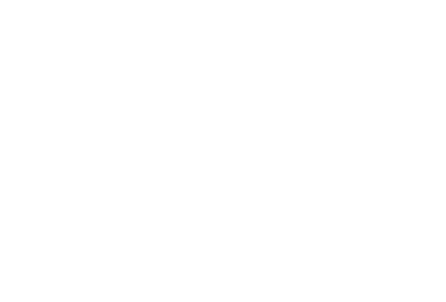

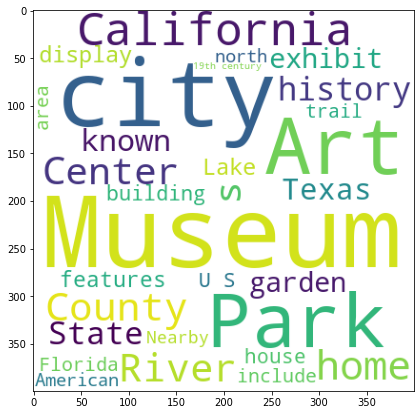

In [10]:
wordcloud = WordCloud(width = 400, height = 400, 
                    background_color ='white', 
                    stopwords = set(STOPWORDS), 
                    min_font_size = 10).generate(allwords)

plt.axis("off") 
plt.tight_layout(pad = 0) 

plt.figure(figsize = (7, 7), facecolor = 'white', edgecolor='blue') 
plt.imshow(wordcloud) 

plt.show()

In [11]:
vectorizer = TfidfVectorizer()
vectors = vectorizer.fit_transform(df["questions"])
feature_names = vectorizer.get_feature_names()
dense = vectors.todense()
denselist = dense.tolist()
vec_df = pd.DataFrame(denselist, columns=feature_names)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [12]:
vec_df

,about,also,ana,anaheim,anchorage,and,angeles,any,anything,architecture,...,toledo,usa,vegas,we,what,when,where,which,wichita,you
0,0.000000,0.0,0.0,0.0,0.0,0.0,0.625104,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.276536,0.0,0.0
1,0.252454,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.128109,0.0,0.000000,0.000000,0.0,0.0
2,0.415825,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.211012,0.0,0.000000,0.000000,0.0,0.0
3,0.415825,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.211012,0.0,0.000000,0.000000,0.0,0.0
4,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.147409,0.0,0.000000,0.000000,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.213093,0.0,0.000000,0.000000,0.0,0.0
496,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.294355,0.0,0.000000,0.000000,0.0,0.0
497,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.628354,0.000000,0.0,0.0
498,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.213093,0.0,0.000000,0.000000,0.0,0.0


In [20]:
!pip install nltk

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [21]:
# nltk.download('wordnet')
nltk.download('omw-1.4')

NameError: ignored

In [22]:
from nltk import everygrams
from nltk.corpus import stopwords
import re
from nltk.corpus import wordnet as wn
from nltk.stem.snowball import SnowballStemmer as snowball_stemmer


def clean_text_function2(text):
    t = text #contractions.fix(text)
    t= t.lower().split()#lower case
    t = [(re.sub(r'[^a-z ]', '', ch)) for ch in t]#remove everything other than a-z
    #t=[word for word in t if word not in stopword]#removing stop words
    t= [wn.lemmatize(word) for word in t]
    t=[snowball_stemmer.stem(word) for word in t]
    t=(' ').join(t)
    t=list(everygrams(t.split(), 2, 3))
    return t

In [23]:
# clean_text_function2(df['context'][0])
a=df["context"][0]
a

'Los Angeles is a sprawling Southern California city and the center of the nation’s film and television industry. Near its iconic Hollywood sign, studios such as Paramount Pictures, Universal and Warner Brothers offer behind-the-scenes tours. On Hollywood Boulevard, TCL Chinese Theatre displays celebrities’ hand- and footprints, the Walk of Fame honors thousands of luminaries and vendors sell maps to stars’ homes'

In [24]:
s = a.split()


In [25]:

words = []
for i in df["context"].unique():
  s=i.split()
  words = [*words, *s]
  

In [28]:
# STOPWORDS
import nltk

In [56]:
df_bigram = pd.DataFrame()
df_bigram2 = pd.Series(nltk.ngrams(words, 2)).value_counts()
bigrams_series = (pd.Series(nltk.ngrams(words, 2)).value_counts())
bigrams = list(bigrams_series.index)
print(len(bigrams))
clean = []
flag = 0
for gram in bigrams:
  for stop in STOPWORDS:
    if stop in gram:
      # print(stop,gram)
      bigrams.remove(gram)
      flag = 1
      break
    flag = 0
  if flag == 0:
    clean.append(gram)
  

# clean = [gram for gram in bigrams if not any(stop in bigrams for stop in STOPWORDS)]
print(clean[:10])
print(len(clean))


6762
[('populous', 'city'), ('U.S.', 'state'), ('The', 'city'), ('largest', 'city'), ('2020', 'census,'), ("It's", 'known'), ('capital', 'city'), ('Los', 'Angeles.'), ('metropolitan', 'area'), ('state', 'capital')]
2782


In [59]:
bigram_series_2 = bigrams_series.loc[clean]
# clean[0]

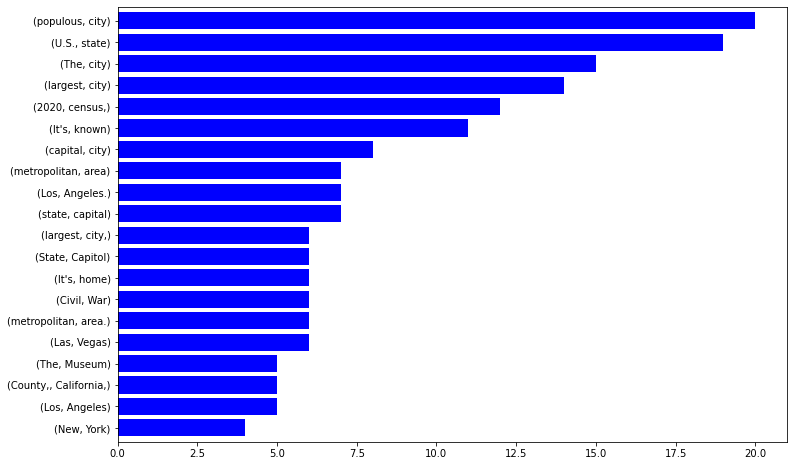

In [61]:
bigram_series_2[:20].sort_values().plot.barh(color='blue', width=0.8, figsize=(12,8))
